<a href="https://colab.research.google.com/github/nuwanc/ml/blob/main/Sarimax2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Mean Squared Error: 94029.95300600555


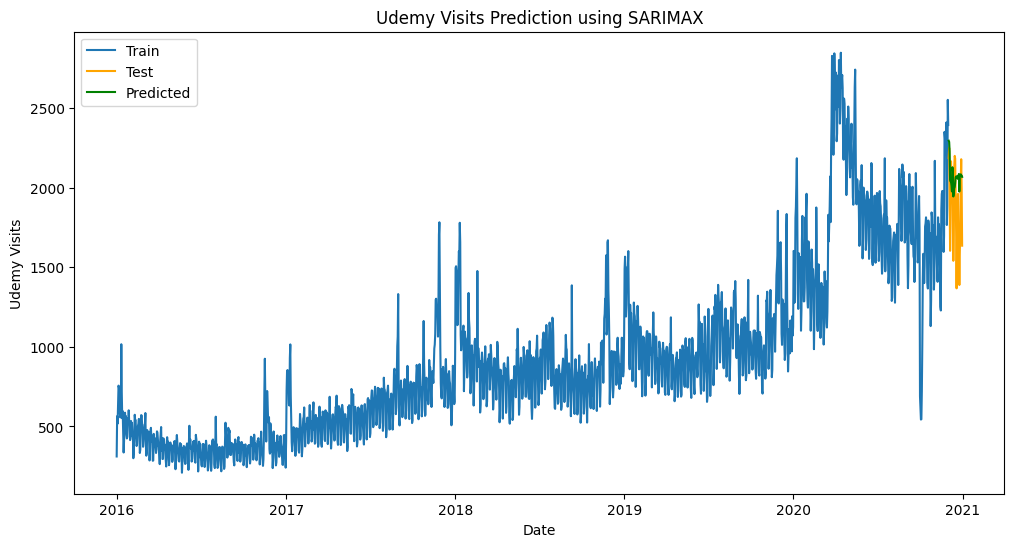

In [8]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Load the dataset
url = "https://raw.githubusercontent.com/diogoalvesderesende/datasets/Datasets/Udemy_wikipedia_visits.csv"
data = pd.read_csv(url, parse_dates=['Date'], index_col='Date')

# Check for missing values
data = data.dropna()

# Split the data into train and test sets
train = data.iloc[:-30]
test = data.iloc[-30:]

# Define the SARIMAX model
model = sm.tsa.statespace.SARIMAX(
    train['Udemy'],
    exog=train[['Easter', 'Christmas']],
    order=(1, 1, 1),
    seasonal_order=(1, 1, 1, 12),
    enforce_stationarity=False,
    enforce_invertibility=False
)

# Fit the model
results = model.fit(disp=False)

# Make predictions
predictions = results.get_prediction(start=test.index[0], end=test.index[-1], exog=test[['Easter', 'Christmas']], dynamic=False)
predicted_mean = predictions.predicted_mean

# Calculate mean squared error
mse = mean_squared_error(test['Udemy'], predicted_mean)
print(f'Mean Squared Error: {mse}')

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Udemy'], label='Train')
plt.plot(test.index, test['Udemy'], label='Test', color='orange')
plt.plot(predicted_mean.index, predicted_mean, label='Predicted', color='green')
plt.xlabel('Date')
plt.ylabel('Udemy Visits')
plt.title('Udemy Visits Prediction using SARIMAX')
plt.legend()
plt.show()
